<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
model_data = pd.read_csv('query_1.csv')
city_data = pd.read_csv('query_3.csv')

In [ ]:
model_data.info()
print()
model_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes



,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


***Промежуточные выводы:***

* Пропусков нет, типы данных допустимые

In [ ]:
city_data.info()
print()
city_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB



,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [ ]:
city_data['average_flights'] = city_data['average_flights'].round(0)
city_data['average_flights'] = city_data['average_flights'].astype('int64')
city_data.head()

,city,average_flights
0,Абакан,4
1,Анадырь,1
2,Анапа,2
3,Архангельск,5
4,Астрахань,2


***Промежуточные выводы:***

* Долго думал, менять ли данные, ведь среднее число чего бы не было, может быть нецелым, т.к. это расчетный показатель. Однако, вспоминив, что никогда не слышал раньше "полтора вылета", решил поменять.
* Пропуски в данных отсутствуют. 

In [ ]:
top10_city = city_data.sort_values(by = 'average_flights', ascending = False)[0:10]
top10_city

,city,average_flights
43,Москва,130
70,Санкт-Петербург,31
54,Новосибирск,17
33,Красноярск,12
20,Екатеринбург,11
67,Ростов-на-Дону,10
74,Сочи,10
84,Ульяновск,10
63,Пермь,10
10,Брянск,10


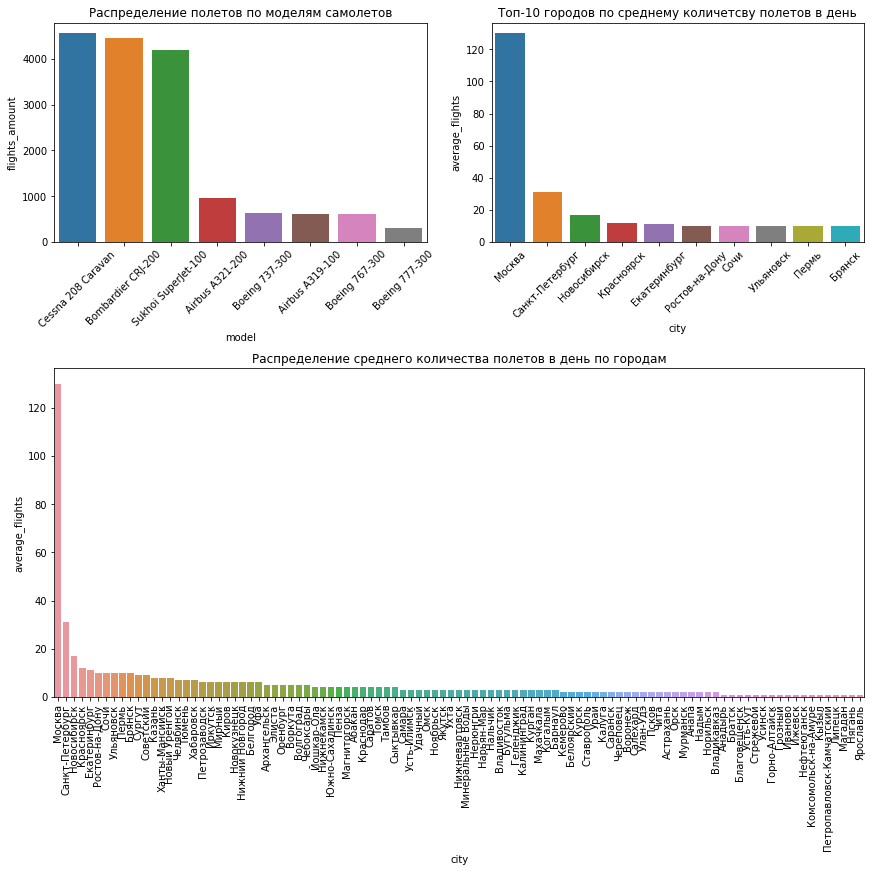

In [ ]:
fig3 = plt.figure(constrained_layout=True, figsize = (12,12))
gs = fig3.add_gridspec(5, 2)

f3_ax1 = fig3.add_subplot(gs[:2, 0])
f3_ax1.set_title('Распределение полетов по моделям самолетов')
plt.xticks(rotation=45)
sns.barplot(x = 'model', y = 'flights_amount', 
            data = model_data, order = model_data.sort_values('flights_amount', ascending =False).model)


f3_ax2 = fig3.add_subplot(gs[:2,1])
f3_ax2.set_title('Топ-10 городов по среднему количетсву полетов в день')
plt.xticks(rotation=45)
sns.barplot(x = 'city', y = 'average_flights', 
            data = top10_city, order = top10_city.sort_values('average_flights', ascending = False).city)



f3_ax3 = fig3.add_subplot(gs[2:,:2])
f3_ax3.set_title('Распределение среднего количества полетов в день по городам')
sns.barplot(x = 'city', y = 'average_flights', 
            data = city_data, order = city_data.sort_values('average_flights', ascending = False).city)
plt.xticks(rotation=90)

plt.show()

**Общий вывод**

* Как и ожидалось, ТОП-10 городов по среднему кол-ву полетов в день занимают крупные города России. Больше всех полетов приходится на столицу и Санкт-Петербург.
* Интересным фактом является то, что больше всего полетов у модели частной авиации Cessna. Больше всего полетов приходится на 3 модели: Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi Superjet-100. 


## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Файлы изучены
- [x]  Типы данных проверены на корректность
- [x]  Выбран топ-10 городов по количеству рейсов
- [x]  Построен график «Модели самолётов и количество рейсов»
- [x]  Построен график «Города и количество рейсов»
- [x]  Построен график «Топ-10 городов и количество рейсов»
- [x]  На каждом этапе написаны выводы
- [x]  Написан общий вывод